A greenhouse gas (GHG) is a gas that traps heat in the atmosphere. Greenhouse gases let sunlight pass through the atmosphere but prevent heat from leaving the atmosphere, also known as the greenhouse effect. Greenhouse gases are essential to keeping the Earth warm; without them, the Earth would be an average of about 0°F. The primary greenhouse gases in Earth’s atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone.
  
Carbon dioxide (CO2) is a colourless, odourless and non-poisonous gas formed by combustion of carbon and in the respiration of living organisms and is considered a greenhouse gas. Emissions means the release of greenhouse gases and/or their precursors into the atmosphere over a specified area and period of time. Carbon dioxide emissions or CO2 emissions are emissions stemming from the burning of fossil fuels and the manufacture of cement; they include carbon dioxide produced during consumption of solid, liquid, and gas fuels as well as gas flaring.

Importing all neccessary libraries

In [210]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [135]:
%cd /Users/gunelmuradova/Downloads

[Errno 2] No such file or directory: '/Users/gunelmuradova/Downloads'
/mnt/c/Users/Harini Pravin/Desktop/class_notes


Importing Dataset

In [211]:
df = pd.read_csv('owid-co2-data.csv')

In [212]:
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [213]:
#size of the dataframe
df.shape

(25191, 60)

In [214]:
#count of unique countries
df['country'].value_counts()

EU-28                       271
United Kingdom              271
World                       271
Europe                      271
Europe (excl. EU-27)        271
                           ... 
Turks and Caicos Islands     31
Timor                        31
Kuwaiti Oil Fires            30
Wallis and Futuna            20
Kosovo                       13
Name: country, Length: 243, dtype: int64

In [215]:
#the variables are in correct data type. No date column present. Year is in integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21960 non-null  object 
 1   country                              25191 non-null  object 
 2   year                                 25191 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   co2_per_capita                       23307 non-null  float64
 5   trade_co2                            3976 non-null   float64
 6   cement_co2                           12248 non-null  float64
 7   cement_co2_per_capita                12218 non-null  float64
 8   coal_co2                             17188 non-null  float64
 9   coal_co2_per_capita                  16860 non-null  float64
 10  flaring_co2                          4382 non-null   float64
 11  flaring_co2_per_capita      

In [216]:
# Creating a regions dataframe which contains the information on continents for the last 5 years.
regions = df[(df['country'] == 'Africa' ) | (df['country'] == 'Asia')|(df['country'] == 'Asia (excl. China & India)')|
(df['country'] == 'EU-27')|(df['country'] == 'EU-28')|(df['country'] == 'Europe')| (df['country'] == 'Europe (excl. EU-27)')| 
(df['country'] == 'Europe (excl. EU-28)')| (df['country'] == 'International transport')|(df['country']== 'North America')|
(df['country'] == 'South America')|(df['country'] == 'Australia')|(df['country']=='Russia')]
regions = regions.loc[regions['year'] >= 2000]
regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 188 to 20867
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             42 non-null     object 
 1   country                              273 non-null    object 
 2   year                                 273 non-null    int64  
 3   co2                                  273 non-null    float64
 4   co2_per_capita                       252 non-null    float64
 5   trade_co2                            240 non-null    float64
 6   cement_co2                           252 non-null    float64
 7   cement_co2_per_capita                252 non-null    float64
 8   coal_co2                             252 non-null    float64
 9   coal_co2_per_capita                  252 non-null    float64
 10  flaring_co2                          252 non-null    float64
 11  flaring_co2_per_capita      

In [217]:
#printing first 5 rows of regions dataset.
regions.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
188,NaN,Africa,2000,886.562,1.094,-266.512,31.510,0.039,370.247,0.457,...,NaN,NaN,NaN,NaN,NaN,810984230.0,NaN,3192.725,3936.853,NaN
189,NaN,Africa,2001,884.168,1.064,-275.648,32.908,0.040,371.980,0.448,...,NaN,NaN,NaN,NaN,NaN,830902539.0,NaN,3317.609,3992.775,NaN
190,NaN,Africa,2002,892.575,1.049,-292.434,35.231,0.041,361.119,0.424,...,NaN,NaN,NaN,NaN,NaN,851298437.0,NaN,3354.459,3940.405,NaN
191,NaN,Africa,2003,967.220,1.109,-298.849,35.508,0.041,390.893,0.448,...,NaN,NaN,NaN,NaN,NaN,872248336.0,NaN,3513.656,4028.276,NaN
192,NaN,Africa,2004,1036.686,1.160,-320.442,38.170,0.043,417.515,0.467,...,NaN,NaN,NaN,NaN,NaN,893842786.0,NaN,3765.085,4212.245,NaN


In [218]:
#sorting by iso_code
df = df.sort_values("iso_code")

In [219]:
#printing number of null values in column iso_code
df["iso_code"].isnull().sum()

3231

In [220]:
# Dropping regions from the main dataframe
df.drop(df.tail(503).index, inplace = True)

In [221]:
# Checking the dataframe if it contains any region name
df.loc[(df['country'] == 'Europe')|(df['country'] == 'Africa')|(df['country'] == 'Europe (excl. EU-27)')]

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
72,NaN,Africa,1884,0.022,0.005,NaN,NaN,NaN,0.022,0.005,...,NaN,NaN,NaN,NaN,NaN,130848603.0,NaN,NaN,NaN,NaN
73,NaN,Africa,1885,0.037,0.008,NaN,NaN,NaN,0.037,0.008,...,NaN,NaN,NaN,NaN,NaN,131563803.0,NaN,NaN,NaN,NaN
74,NaN,Africa,1886,0.048,0.010,NaN,NaN,NaN,0.048,0.010,...,NaN,NaN,NaN,NaN,NaN,132284841.0,NaN,NaN,NaN,NaN
75,NaN,Africa,1887,0.048,0.010,NaN,NaN,NaN,0.048,0.010,...,NaN,NaN,NaN,NaN,NaN,133011765.0,NaN,NaN,NaN,NaN
76,NaN,Africa,1888,0.081,0.017,NaN,NaN,NaN,0.081,0.017,...,NaN,NaN,NaN,NaN,NaN,133744628.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,NaN,Europe (excl. EU-27),2016,2501.759,8.237,-88.181,36.451,0.120,642.868,2.117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8040,NaN,Europe (excl. EU-27),2017,2507.493,8.242,-77.018,36.549,0.120,602.542,1.980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8041,NaN,Europe (excl. EU-27),2018,2554.828,8.386,-128.291,36.273,0.119,615.098,2.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8042,NaN,Europe (excl. EU-27),2019,2528.176,8.291,-114.141,37.357,0.122,603.374,1.979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Filtering the date 
df = df.loc[df['year'] >= 2000]

In [223]:
# Dropping columns which we don't need
df.drop(['iso_code'], axis=1, inplace=True)

In [224]:
# Checking the data after dropping and filtering the date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 1052 to 16649
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4948 non-null   object 
 1   year                                 4948 non-null   int64  
 2   co2                                  4807 non-null   float64
 3   co2_per_capita                       4744 non-null   float64
 4   trade_co2                            2596 non-null   float64
 5   cement_co2                           3288 non-null   float64
 6   cement_co2_per_capita                3275 non-null   float64
 7   coal_co2                             2774 non-null   float64
 8   coal_co2_per_capita                  2761 non-null   float64
 9   flaring_co2                          1717 non-null   float64
 10  flaring_co2_per_capita               1717 non-null   float64
 11  gas_co2                   

In [225]:
df.isna().sum()

country                                   0
year                                      0
co2                                     141
co2_per_capita                          204
trade_co2                              2352
cement_co2                             1660
cement_co2_per_capita                  1673
coal_co2                               2174
coal_co2_per_capita                    2187
flaring_co2                            3231
flaring_co2_per_capita                 3231
gas_co2                                2246
gas_co2_per_capita                     2246
oil_co2                                 141
oil_co2_per_capita                      204
other_industry_co2                     3793
other_co2_per_capita                   3793
co2_growth_prct                           4
co2_growth_abs                          143
co2_per_gdp                            1618
co2_per_unit_energy                    1069
consumption_co2                        2352
consumption_co2_per_capita      

In [226]:
#Dropping columns which have a lot of missing values
df.drop(df.iloc[:, 4:8], inplace = True, axis = 1)

In [227]:
df.drop(df.columns[[6,7,12,13,14,16,17,18,19,21,22,24,25,26,27,29,31,32,33,34,36,49]],axis =1, inplace = True)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 1052 to 16649
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4948 non-null   object 
 1   year                                 4948 non-null   int64  
 2   co2                                  4807 non-null   float64
 3   co2_per_capita                       4744 non-null   float64
 4   coal_co2_per_capita                  2761 non-null   float64
 5   flaring_co2                          1717 non-null   float64
 6   gas_co2_per_capita                   2702 non-null   float64
 7   oil_co2                              4807 non-null   float64
 8   oil_co2_per_capita                   4744 non-null   float64
 9   other_industry_co2                   1155 non-null   float64
 10  co2_per_gdp                          3330 non-null   float64
 11  cumulative_co2            

In [229]:
df.head()

,country,year,co2,co2_per_capita,coal_co2_per_capita,flaring_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,other_industry_co2,...,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
1052,Aruba,2020,0.753,7.055,NaN,NaN,NaN,0.753,7.055,NaN,...,NaN,NaN,NaN,NaN,NaN,106766.0,NaN,NaN,NaN,NaN
1051,Aruba,2019,0.851,8.006,NaN,NaN,NaN,0.851,8.006,NaN,...,NaN,NaN,NaN,NaN,NaN,106310.0,NaN,NaN,NaN,NaN
1050,Aruba,2018,0.872,8.239,NaN,NaN,NaN,0.872,8.239,NaN,...,NaN,NaN,NaN,NaN,NaN,105846.0,NaN,NaN,NaN,NaN
1049,Aruba,2017,0.890,8.450,NaN,NaN,NaN,0.890,8.450,NaN,...,NaN,NaN,NaN,NaN,NaN,105361.0,NaN,NaN,NaN,NaN
1048,Aruba,2016,0.883,8.421,NaN,NaN,NaN,0.883,8.421,NaN,...,NaN,NaN,NaN,NaN,NaN,104865.0,NaN,5.418,51604.092,NaN


Using the regions dataset..

Understanding continent-wise data

Let's plot some visualizations to see which continents generates most co2 emissions

In [230]:
regions.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
188,NaN,Africa,2000,886.562,1.094,-266.512,31.510,0.039,370.247,0.457,...,NaN,NaN,NaN,NaN,NaN,810984230.0,NaN,3192.725,3936.853,NaN
189,NaN,Africa,2001,884.168,1.064,-275.648,32.908,0.040,371.980,0.448,...,NaN,NaN,NaN,NaN,NaN,830902539.0,NaN,3317.609,3992.775,NaN
190,NaN,Africa,2002,892.575,1.049,-292.434,35.231,0.041,361.119,0.424,...,NaN,NaN,NaN,NaN,NaN,851298437.0,NaN,3354.459,3940.405,NaN
191,NaN,Africa,2003,967.220,1.109,-298.849,35.508,0.041,390.893,0.448,...,NaN,NaN,NaN,NaN,NaN,872248336.0,NaN,3513.656,4028.276,NaN
192,NaN,Africa,2004,1036.686,1.160,-320.442,38.170,0.043,417.515,0.467,...,NaN,NaN,NaN,NaN,NaN,893842786.0,NaN,3765.085,4212.245,NaN


In [231]:
#inspecting the regions dataset
regions.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,273.000000,273.000000,252.000000,240.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,1.470000e+02,3.800000e+01,100.000000,100.000000,34.000000
mean,2010.000000,3992.934436,7.847702,-31.593342,144.110484,0.146258,1549.869968,2.590603,51.573429,0.129107,...,17.953035,456.124561,4.373281,125.610877,1.560526,1.013174e+09,1.894503e+12,13918.869780,50695.577750,2.583441
std,6.066422,4132.217783,4.587638,548.358208,257.759296,0.047845,2305.301477,2.138455,32.327544,0.120516,...,8.017001,266.665673,2.573038,83.862506,1.660907,1.351376e+09,1.074675e+12,11965.628352,30759.425866,1.275052
min,2000.000000,351.820000,0.990000,-1657.998000,2.946000,0.039000,71.300000,0.196000,6.930000,0.017000,...,8.024000,119.110000,0.893000,51.820000,0.361000,1.899143e+07,6.918867e+11,1313.507000,3936.853000,1.527000
25%,2005.000000,1218.023000,3.917250,-292.439000,32.909000,0.122000,423.259750,1.168250,26.439000,0.052000,...,9.864000,167.510000,1.093000,58.020000,0.410000,1.456321e+08,9.722201e+11,3784.498000,31573.739000,1.660000
50%,2010.000000,2598.575000,8.289500,-61.284500,68.511500,0.146000,796.948000,2.444000,45.205000,0.092000,...,17.075000,435.540000,5.464000,77.650000,0.523000,5.423984e+08,1.389521e+12,7826.344000,54505.719000,2.124500
75%,2015.000000,5775.159000,9.548500,378.708500,106.574500,0.171000,1642.448500,2.789250,67.414750,0.151000,...,25.152000,756.600000,5.853000,216.300000,3.036000,9.049985e+08,3.027119e+12,25001.270500,70313.476500,2.876500
max,2020.000000,20608.593000,19.455000,1028.487000,1315.197000,0.284000,11265.459000,10.276000,163.145000,0.798000,...,33.035000,856.000000,9.208000,275.140000,5.746000,4.639847e+09,3.613411e+12,32718.297000,101186.932000,5.696000


In [232]:
#size of the dataset
regions.shape

(273, 60)

In [233]:
regions['country'].value_counts()

Africa                        21
Asia                          21
Asia (excl. China & India)    21
Australia                     21
EU-27                         21
EU-28                         21
Europe                        21
Europe (excl. EU-27)          21
Europe (excl. EU-28)          21
International transport       21
North America                 21
Russia                        21
South America                 21
Name: country, dtype: int64

In [234]:
regions.isnull().sum()

iso_code                               231
country                                  0
year                                     0
co2                                      0
co2_per_capita                          21
trade_co2                               33
cement_co2                              21
cement_co2_per_capita                   21
coal_co2                                21
coal_co2_per_capita                     21
flaring_co2                             21
flaring_co2_per_capita                  21
gas_co2                                 21
gas_co2_per_capita                      21
oil_co2                                  0
oil_co2_per_capita                      21
other_industry_co2                      42
other_co2_per_capita                    42
co2_growth_prct                          0
co2_growth_abs                           0
co2_per_gdp                             45
co2_per_unit_energy                     33
consumption_co2                         33
consumption

In [235]:
regions.drop(columns=['iso_code','total_ghg','ghg_per_capita','total_ghg_excluding_lucf','methane','methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita',
                 'population','gdp','primary_energy_consumption','energy_per_capita','energy_per_gdp','ghg_excluding_lucf_per_capita'],inplace=True)

In [236]:
regions.isnull().sum()

country                                 0
year                                    0
co2                                     0
co2_per_capita                         21
trade_co2                              33
cement_co2                             21
cement_co2_per_capita                  21
coal_co2                               21
coal_co2_per_capita                    21
flaring_co2                            21
flaring_co2_per_capita                 21
gas_co2                                21
gas_co2_per_capita                     21
oil_co2                                 0
oil_co2_per_capita                     21
other_industry_co2                     42
other_co2_per_capita                   42
co2_growth_prct                         0
co2_growth_abs                          0
co2_per_gdp                            45
co2_per_unit_energy                    33
consumption_co2                        33
consumption_co2_per_capita             33
consumption_co2_per_gdp           

In [237]:
#regions['co2_per_capita'].fillna(regions['co2_per_capita'].median(),inplace=True)

Mean is not advisable to use to fill na values because of the presence of outliers. So in that case we can go for interpolation, particularly, for variables that change with time like temperature for an example

In [238]:
#filling null values by interpolation both forward and backward direction
regions.interpolate(method = 'linear', limit_direction = 'forward',inplace=True)
regions.interpolate(method = 'linear', limit_direction = 'backward',inplace=True)

In [239]:
regions.isnull().sum()

country                                0
year                                   0
co2                                    0
co2_per_capita                         0
trade_co2                              0
cement_co2                             0
cement_co2_per_capita                  0
coal_co2                               0
coal_co2_per_capita                    0
flaring_co2                            0
flaring_co2_per_capita                 0
gas_co2                                0
gas_co2_per_capita                     0
oil_co2                                0
oil_co2_per_capita                     0
other_industry_co2                     0
other_co2_per_capita                   0
co2_growth_prct                        0
co2_growth_abs                         0
co2_per_gdp                            0
co2_per_unit_energy                    0
consumption_co2                        0
consumption_co2_per_capita             0
consumption_co2_per_gdp                0
cumulative_co2  

In [240]:
#filtering the last 5 years
regions = regions.loc[regions['year'] >= 2015]

In [241]:
#regions[regions['country']=='North America']

Creating a new column for total co2 emission from production based activities, 

trade, from cement, burning up of coal, oil, gas, flaring and other industry based activites measured in million tonnes.

In [242]:
#creating a new column for total co2 emission
regions['Total_co2_emission'] = regions['co2']+regions['trade_co2']+regions['cement_co2']+regions['coal_co2']+regions['flaring_co2']\
                                +regions['gas_co2']+regions['oil_co2']+regions['other_industry_co2']+regions['consumption_co2']

Creating a new column for total co2 emission per capita from production based activities, 

trade, from cement, burning up of coal, oil, gas, flaring and other industry based activites measured in million tonnes per person

In [243]:

regions['Total_co2_emission_per_capita'] = regions['co2_per_capita']+regions['cement_co2_per_capita']+regions['coal_co2_per_capita']+regions['flaring_co2_per_capita']\
                                +regions['gas_co2_per_capita']+regions['oil_co2_per_capita']+regions['other_co2_per_capita']+regions['consumption_co2_per_capita']

 Creating a new column for total share global 

 measured as a percentage of global emissions of CO2 from production based activities, 

 trade, from cement, burning up of coal, oil, gas, flaring and other industry based activites

In [244]:
regions['Total_share_global'] = regions['share_global_co2']+regions['share_global_cement_co2']+regions['share_global_coal_co2']+regions['share_global_flaring_co2']\
                                +regions['share_global_gas_co2']+regions['share_global_oil_co2']+regions['share_global_other_co2']

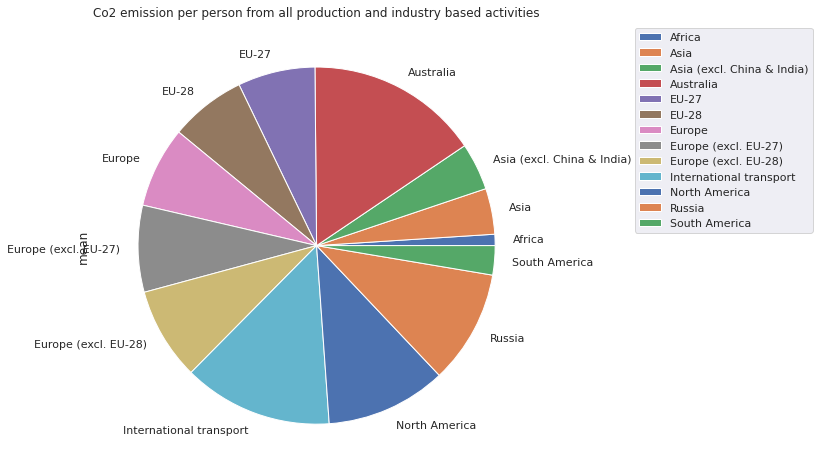

In [245]:
regions.groupby(['country'])['Total_co2_emission_per_capita'].agg(['mean']).plot(kind='pie',subplots=True)
plt.legend(bbox_to_anchor=(1.20,1),loc="upper left")
plt.title('Co2 emission per person from all production and industry based activities');

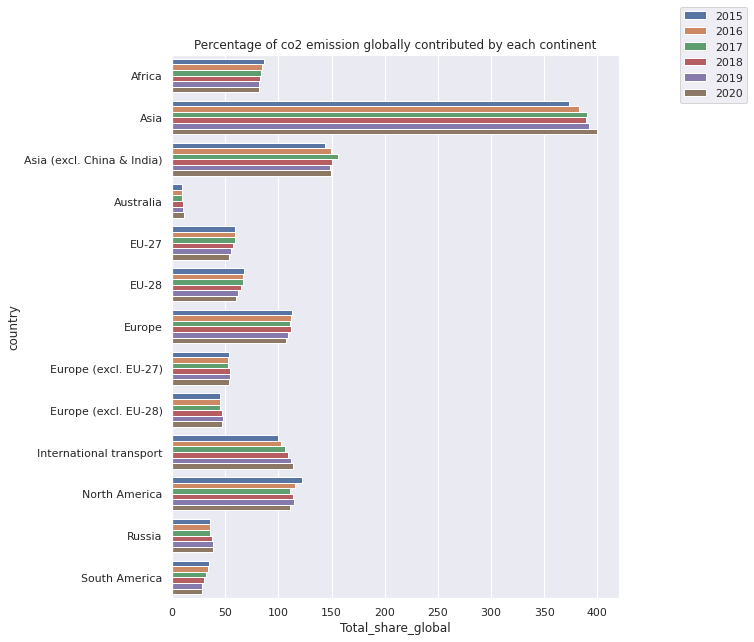

In [246]:
x = regions['country']
y=  regions['Total_share_global']
hue= regions['year']
a=sns.barplot(x=y, y=x, hue=hue, data=regions) 
plt.legend(bbox_to_anchor=(1.30,1),loc="right")
sns.set(rc = {'figure.figsize':(8,10)})
a.set_title('Percentage of co2 emission globally contributed by each continent');

In [247]:
#regions_subset1 = regions[['Total_co2_emission','Total_co2_emission_per_capita']]
#regions_subset2 = regions[['Total_co2_emission','Total_share_global']]

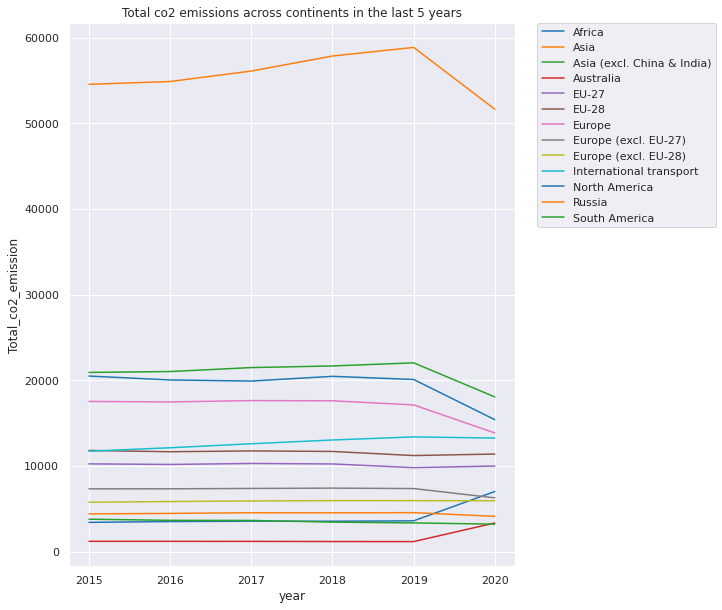

In [248]:
p =sns.lineplot(data=regions,x=regions['year'],y=regions['Total_co2_emission'],hue=regions['country'],palette='tab10')
#sns.lineplot(data=regions,x=regions['year'],y=regions_subset,hue=regions['country'])
#sns.lineplot(data=regions_subset2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
p.set_title('Total co2 emissions across continents in the last 5 years');